In [1]:
# Global configuration

import sys
sys.path.append('..')

import warnings
warnings.filterwarnings('ignore')

import jax
jax.config.update("jax_enable_x64", True)
jax.config.update("jax_debug_nans", True)

In [2]:
# Load modules

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
# Load developping modules

from models.gpr import *
from utils.plots import *

In [4]:
# Data definition

X_tr = jnp.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
y_tr = jnp.sin(X_tr).ravel() + np.random.normal(0, 1, size=len(X_tr))
y_tr = y_tr.reshape(-1, 1)

X = jnp.linspace(-5, 5, 50).reshape(-1, 1)

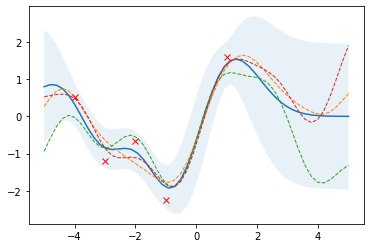

In [5]:
# Without optimization

m = GPRegressor(Kernel(rbf_kn, [1, 1])).fit(X_tr, y_tr, sgm_y=0.1)
mu, cov = m.predict(X)

samples = np.random.multivariate_normal(mu.ravel(), cov, 3)

plot_gp1d(mu, cov, X, X_tr, y_tr, samples)

OptStep(params=DeviceArray([1.65930531, 1.60389758], dtype=float64), state=ScipyMinimizeInfo(fun_val=DeviceArray(8.68517027, dtype=float64, weak_type=True), success=True, status=0, iter_num=10))


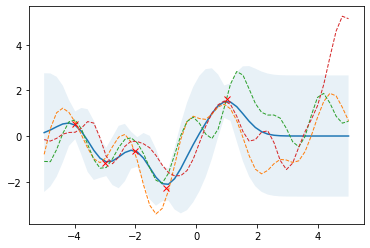

In [6]:
# With optimization

m = GPRegressor(Kernel(rbf_kn, [1., 1.])).fit(X_tr, y_tr, sgm_y=0.1)
m.optimize(stable=True, verbose=False)

mu, cov = m.predict(X)
samples = np.random.multivariate_normal(mu.ravel(), cov, 3)
print(m.res)

plot_gp1d(mu, cov, X, X_tr, y_tr, samples)